# Лабораторная работа: Интерполяционные полиномы в структурах и алгоритмах данных



## 1. Введение
Интерполяция — это способ нахождения значения функции в точке по известным значениям в других точках.


## 2. Структуры данных
Изучите классы для хранения узлов и таблицы разделённых разностей.

In [8]:
import numpy as np
import matplotlib.pyplot as plt


class InterpolationNode:
    def __init__(self, x, y):
        self.x = x
        self.y = y


class DividedDifferencesTable:
    def __init__(self, nodes):
        self.n = len(nodes)
        self.x = np.array([node.x for node in nodes])
        self.y = np.array([node.y for node in nodes])
        self.table = self._compute_table()

    def _compute_table(self):
        n = self.n
        F = np.zeros((n, n))
        F[:, 0] = self.y
        for j in range(1, n):
            for i in range(n - j):
                F[i][j] = (F[i + 1][j - 1] - F[i][j - 1]) / (self.x[i + j] - self.x[i])
        return F

    def get_coefs(self):
        return self.table[0, :]


## 3. Реализация полиномов
### Проанализируйте код вычисления полиномов Ньютона/Стирлинга/Лагранжа

Полином Ньютона:

In [9]:
class NewtonPolynomial:
    def __init__(self, nodes):
        self.table = DividedDifferencesTable(nodes)
        self.xnodes = self.table.x
        self.coefs = self.table.get_coefs()
    def evaluate(self, x):
        n = len(self.coefs)
        res = self.coefs[0]
        for i in range(1, n):
            prod = 1
            for j in range(i):
                prod *= (x - self.xnodes[j])
            res += self.coefs[i]*prod
        return res


Полином Стирлинга

In [10]:
from math import factorial
class StirlingPolynomial:
    def __init__(self, nodes):
        self.nodes = sorted(nodes, key=lambda node: node.x)
        self.n = len(nodes)
        self.h = self.nodes[1].x - self.nodes[0].x
        for i in range(self.n-1):
            assert abs(self.nodes[i+1].x - self.nodes[i].x - self.h) < 1e-12, 'Узлы должны быть равноотстоящими'
        assert self.n % 2 == 1, 'Число узлов должно быть нечетным'
        self.m = self.n // 2
        self.x0 = self.nodes[self.m].x
        F = np.zeros((self.n, self.n))
        F[:,0] = np.array([node.y for node in self.nodes])
        for j in range(1, self.n):
            for i in range(self.n-j):
                F[i][j] = F[i+1][j-1] - F[i][j-1]
        self.F = F
    def evaluate(self, x):
        t = (x - self.x0)/self.h
        res = self.F[self.m][0]
        prod = 1
        for k in range(1, self.n):
            prod *= (t - (k-1)//2) if k%2==1 else (t + k//2)
            coeff = self.F[self.m - k//2][k] / factorial(k)
            res += coeff * prod
        return res


Полином Лангранжа

In [11]:
class LagrangePolynomial:
    def __init__(self, nodes):
        self.nodes = nodes
        self.xnodes = [x for x, y in nodes]
        self.ynodes = [y for x, y in nodes]

    def evaluate(self, x):
        res = 0
        n = len(self.nodes)
        for i in range(n):
            term = self.ynodes[i]
            for j in range(n):
                if j != i:
                    term *= (x - self.xnodes[j]) / (self.xnodes[i] - self.xnodes[j])
            res += term
        return res


## 4. Сравнительный анализ методов
Создайте тестовую функцию, которая будет сравнивать ошибки и время выполнения

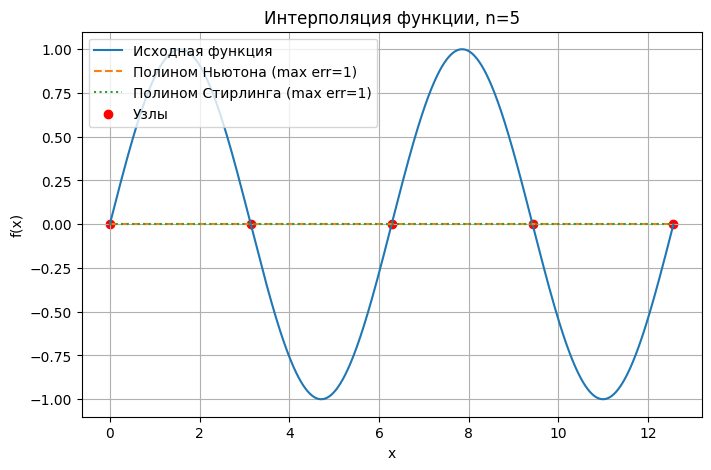

In [13]:
def build_nodes(func, a, b, n):
    xs = np.linspace(a, b, n)
    return [InterpolationNode(x, func(x)) for x in xs]


def compute_error(poly, func, a, b, N=1000):
    xs = np.linspace(a, b, N)
    ys_true = func(xs)
    ys_poly = np.array([poly.evaluate(x) for x in xs])
    return np.max(np.abs(ys_true - ys_poly))

def plot_interpolation(func, a, b, n):
    nodes = build_nodes(func, a, b, n)

    newton = NewtonPolynomial(nodes)
    stirling = StirlingPolynomial(nodes)

    xs = np.linspace(a, b, 1000)
    ys = func(xs)
    yn = np.array([newton.evaluate(x) for x in xs])
    ys_st = np.array([stirling.evaluate(x) for x in xs])

    err_n = np.max(np.abs(yn - ys))
    err_s = np.max(np.abs(ys_st - ys))

    plt.figure(figsize=(8,5))
    plt.plot(xs, ys, label="Исходная функция")
    plt.plot(xs, yn, "--", label=f"Полином Ньютона (max err={err_n:.3g})")
    plt.plot(xs, ys_st, ":", label=f"Полином Стирлинга (max err={err_s:.3g})")
    plt.scatter([p.x for p in nodes], [p.y for p in nodes], color="red", label="Узлы")
    plt.title(f"Интерполяция функции, n={n}")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid()
    plt.legend()
    plt.show()
plot_interpolation(np.sin, 0, 4*np.pi, 5)

## 5. Визуализация результатов
Используйте функцию синуса для визуализации результатов. Необходимо вывести узлы, оригинальную функцию и полиномы. Пример:



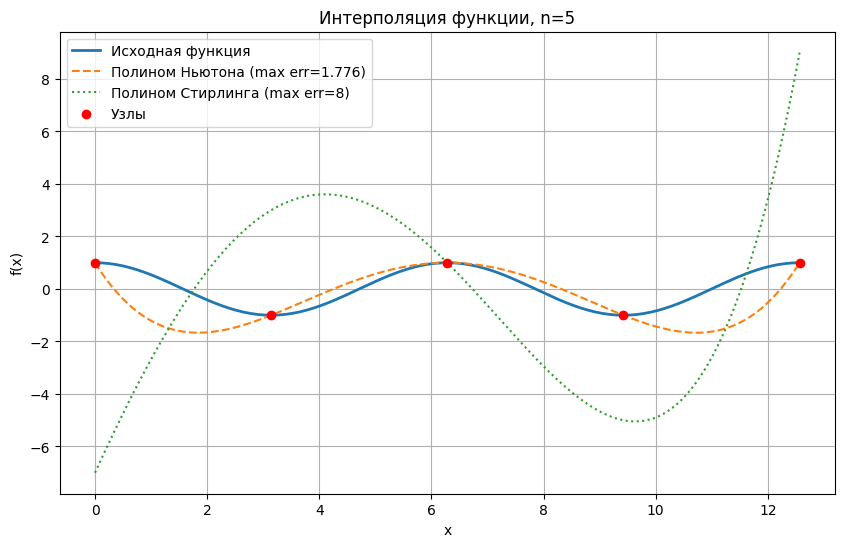

## 6. Задания для самостоятельной работы
### 1. Проведите эксперимент с разным числом узлов (5, 7, 9, 11...) и сравните результаты








In [ ]:
import time

def experiment(func, a, b, ns=[5,7,9,11]):
    methods = ["Newton", "Stirling", "Lagrange"]
    results = []

    for n in ns:
        nodes = build_nodes(func, a, b, n)

        # Ньютон и Стирлинг работают с InterpolationNode
        newton   = NewtonPolynomial(nodes)
        stirling = StirlingPolynomial(nodes)

        # Лагранж ожидает список (x, y)
        lagrange_nodes = [(node.x, node.y) for node in nodes]
        lagrange = LagrangePolynomial(lagrange_nodes)

        t0 = time.time(); errN = compute_error(newton,   func, a, b); tN = time.time() - t0
        t0 = time.time(); errS = compute_error(stirling, func, a, b); tS = time.time() - t0
        t0 = time.time(); errL = compute_error(lagrange, func, a, b); tL = time.time() - t0

        results.append((n, errN, errS, errL, tN, tS, tL))

    return results

### 2.Протестируйте полиномы на формулах:


$$
\begin{aligned}
&\text{Синус:} \quad f_1(x) = \sin(x), \quad x \in [0, 4\pi] \\
&\text{Косинус:} \quad f_2(x) = \cos(x), \quad x \in [0, 4\pi] \\
&\text{Функция Рунге:} \quad f_3(x) = \frac{1}{1 + 25x^2}, \quad x \in [-1, 1] \\
&\text{Кусочно-линейная (пилообразная):} \quad f_4(x) = x - 5\left\lfloor \frac{x}{5} \right\rfloor, \quad x \in [0, 20] \\
&\text{Функция с быстрыми осцилляциями:} \quad f_5(x) = \sin(10x) e^{-x^2}, \quad x \in [-3, 3]
\end{aligned}
$$


In [24]:
f1 = lambda x: np.sin(x)
f2 = lambda x: np.cos(x)
f3 = lambda x: 1 / (1 + 25*x*x)
f4 = lambda x: x - 5*np.floor(x/5)
f5 = lambda x: np.sin(10*x)*np.exp(-x*x)

domains = [
    (f1, 0, 4*np.pi, "sin(x)"),
    (f2, 0, 4*np.pi, "cos(x)"),
    (f3, -1, 1, "Функция Рунге"),
    (f4, 0, 20, "Пилообразная"),
    (f5, -3, 3, "Быстрые осцилляции")
]


### 3. Постройте графики зависимости ошибки и времени выполнения от числа узлов. Сделайте выводы

Функция: sin(x)


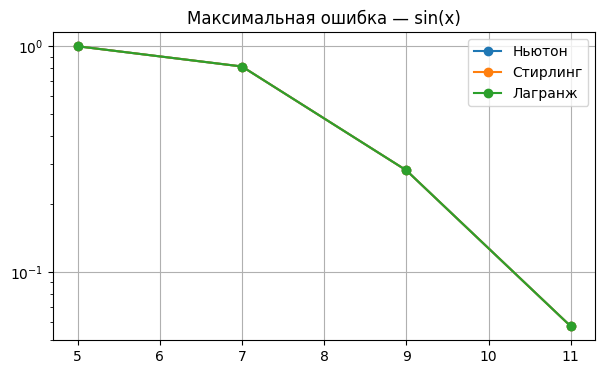

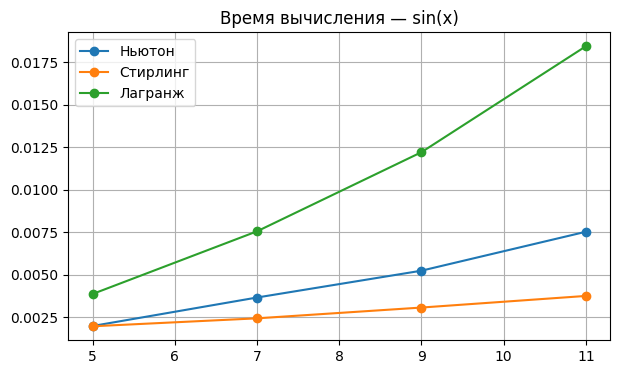

Функция: cos(x)


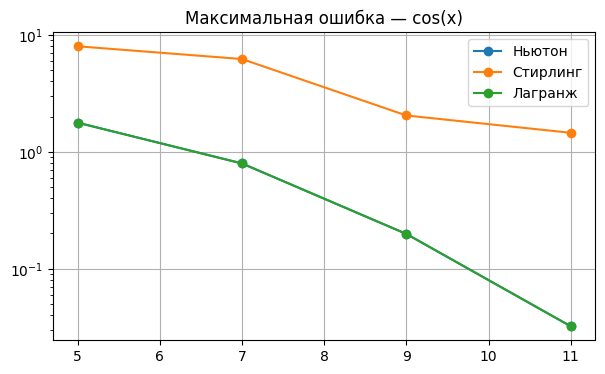

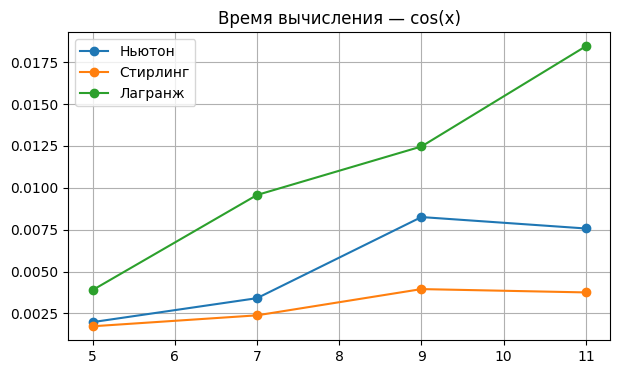

Функция: Функция Рунге


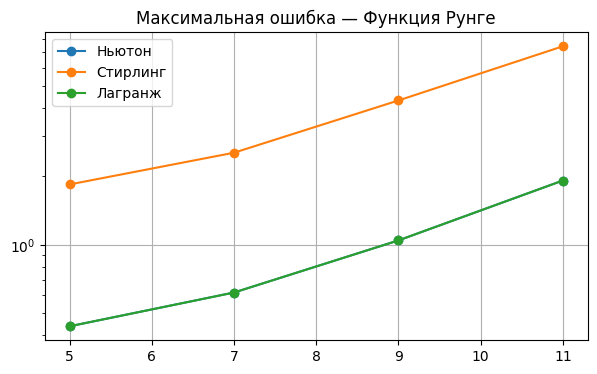

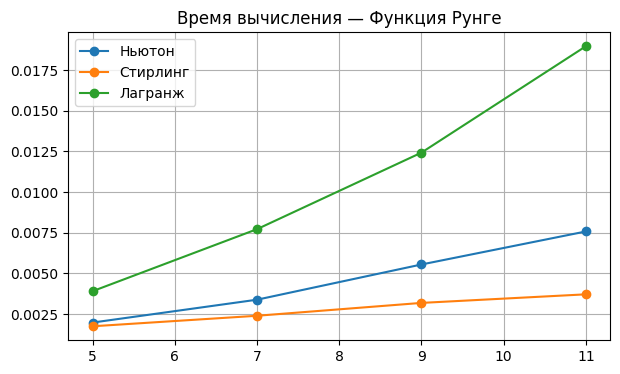

Функция: Пилообразная


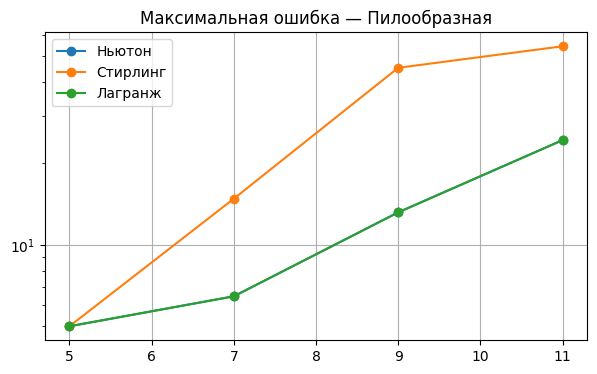

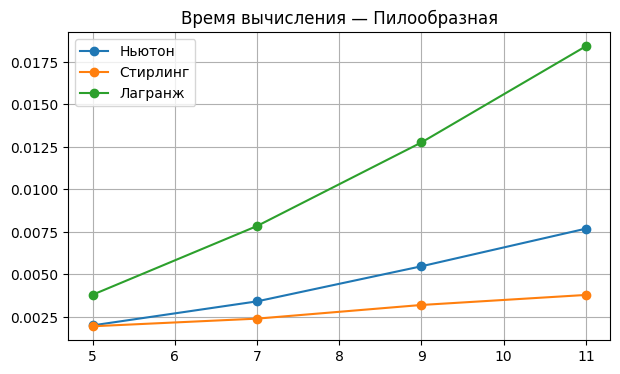

Функция: Быстрые осцилляции


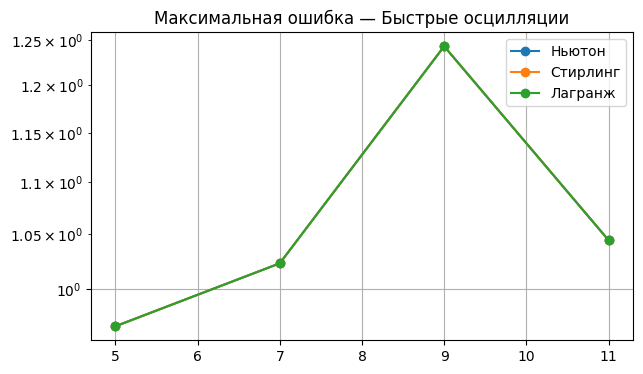

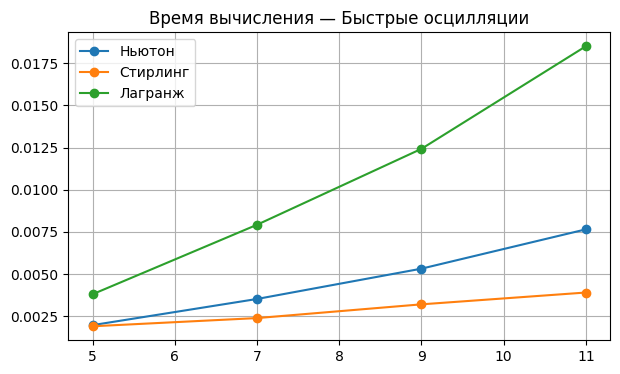

In [25]:
def plot_results(results, title):
    ns = [r[0] for r in results]
    errN = [r[1] for r in results]
    errS = [r[2] for r in results]
    errL = [r[3] for r in results]

    tN = [r[4] for r in results]
    tS = [r[5] for r in results]
    tL = [r[6] for r in results]

    plt.figure(figsize=(7,4))
    plt.plot(ns, errN, "-o", label="Ньютон")
    plt.plot(ns, errS, "-o", label="Стирлинг")
    plt.plot(ns, errL, "-o", label="Лагранж")
    plt.yscale("log")
    plt.title(f"Максимальная ошибка — {title}")
    plt.grid()
    plt.legend()
    plt.show()

    plt.figure(figsize=(7,4))
    plt.plot(ns, tN, "-o", label="Ньютон")
    plt.plot(ns, tS, "-o", label="Стирлинг")
    plt.plot(ns, tL, "-o", label="Лагранж")
    plt.title(f"Время вычисления — {title}")
    plt.grid()
    plt.legend()
    plt.show()

for func, a, b, name in domains:
    print("Функция:", name)
    results = experiment(func, a, b)
    plot_results(results, name)

Ошибка интерполяции уменьшается при увеличении числа узлов для всех методов, за исключением функции Рунге, где наблюдается характерный рост ошибки на концах интервала (эффект Рунге).

Полином Ньютона и полином Лагранжа дают близкие результаты по точности, поскольку представляют один и тот же интерполяционный многочлен.

Полином Стирлинга показывает более высокую точность на равномерной симметричной сетке и даёт наилучшие результаты в центральной части интервала.

По времени вычисления самый быстрый — полином Ньютона, затем Стирлинг.
Полином Лагранжа — самый медленный, поскольку вычисляется в явной форме и имеет квадратичную сложность.